# <font face = 'Impact' color = '#FFAEBC' > Dossier on Regression Analysis Application <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook aims to assess the understanding and skills of learners pertaining to regression analysis. Provided with a data set they will check for regression assumptions and apply the most appropriate regression analysis approach given the characteristics of the dataset.

#### <font face = 'Times New Roman' color = '#B5E5CF'> Name of Data Analysts: **Belleza, Casaquite, Daza, Mangonon, Sabisol, Salao** <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Date of Submission: October 18, 2025<font/>

# Business Concern
You are a business analyst for a financial institution. You are tasked to uncover the factors that would likely yield higher revenues generated from customers. You are provided with the data coming from the operations team. Conduct a literature review to study each variable. The model should only include variables that are reinforced by studies indicating that it is logical to have them. Each explanatory variable should be cited with a reference that supports the idea of having them included in the model. Apply the most appropriate regression analysis approach given the findings of exploratory data analysis. You are required to create a powerpoint presentation out of this to include the following sections:

First Slide: Label the title of this presentation as: Drivers of Generated Revenues from Customers, Indicate the name of the Data Analyst (that would be your name), the name of your mentor (name of your professor), Analytics Application, Date of Submission.

Second Slide: Present the problem experienced by this financial institution. Be creative in your manner of presenting this so that it capture readers' interest and attention.

Third Slide: Provide information about the data set so that the readers' would reinforce their data understanding.

Fourth Slide: Details the methods utilized in the conduct of the analysis. Rationalize the approach selected (whether you did multiple regression or robust regression). The explanation should be convincing enough to support the steps you took in doing the analysis/

Fifth Slide: Present the results of the regression analysis. Provide an interpretation of this result and explain its implication for business operations. This should also contain your recommendations which needs to be data-driven.

Sixth Slide: Present the references you have used for this mini-project.

The dataset is labelled as: "customer_revenue.xlsx"

In [ ]:
# Load the necessary packages
!pip install qdesc
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import qdesc as qd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
print(os.getcwd())

/content/sample_data


In [ ]:
os.chdir('/content/sample_data')

In [ ]:
# Load your dataset
df = pd.read_excel("customer_revenue.xlsx")
# Check out the first few records
df.head()

,Age,Tenure_Months,Total_Orders,Average_Basket_Size,Time_Spent_on_Site,Email_Open_Rate,Discount_Usage_Rate,Customer_Segment,Mobile_App_Usage,Support_Tickets,Referral_Count,Churn_Risk_Score,Monthly_Revenue
0,56,47,24,3.425887,15.426047,0.666566,0.682433,Mid-Tier,0,0,1,0.391709,380.615724
1,69,41,22,3.019148,1.000000,0.145702,0.287779,Mid-Tier,1,2,1,0.166962,322.689682
2,46,49,13,2.358513,14.065519,0.396611,0.311299,Budget,1,1,0,0.205396,68.055328
3,32,14,25,3.487872,6.847634,0.803423,0.403581,Mid-Tier,1,0,0,0.293139,335.729906
4,60,15,22,4.804348,21.029973,0.090117,0.688339,Mid-Tier,0,0,0,0.245784,317.906245


In [ ]:
# View information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  750 non-null    int64  
 1   Tenure_Months        750 non-null    int64  
 2   Total_Orders         750 non-null    int64  
 3   Average_Basket_Size  750 non-null    float64
 4   Time_Spent_on_Site   750 non-null    float64
 5   Email_Open_Rate      750 non-null    float64
 6   Discount_Usage_Rate  750 non-null    float64
 7   Customer_Segment     750 non-null    object 
 8   Mobile_App_Usage     750 non-null    int64  
 9   Support_Tickets      750 non-null    int64  
 10  Referral_Count       750 non-null    int64  
 11  Churn_Risk_Score     750 non-null    float64
 12  Monthly_Revenue      750 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 76.3+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Tenure_Months,0
Total_Orders,0
Average_Basket_Size,0
Time_Spent_on_Site,0
Email_Open_Rate,0
Discount_Usage_Rate,0
Customer_Segment,0
Mobile_App_Usage,0
Support_Tickets,0


In [ ]:
qd.desc(df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Age,750.0,44.15,14.89,45.00,12.00,18.00,69.00,6.80,0.78
Tenure_Months,750.0,29.94,17.29,30.00,16.00,1.00,59.00,9.30,0.78
Total_Orders,750.0,19.94,4.68,20.00,3.00,7.00,36.00,2.06,0.78
Average_Basket_Size,750.0,3.03,0.98,3.01,0.66,0.25,6.93,0.40,0.78
Time_Spent_on_Site,750.0,15.06,5.16,15.23,3.65,1.00,29.34,0.35,0.78
Email_Open_Rate,750.0,0.47,0.25,0.45,0.21,0.05,0.90,8.23,0.78
Discount_Usage_Rate,750.0,0.35,0.20,0.34,0.18,0.00,0.70,9.90,0.78
Mobile_App_Usage,750.0,0.68,0.47,1.00,0.00,0.00,1.00,158.01,0.78
Support_Tickets,750.0,0.98,0.92,1.00,1.00,0.00,5.00,45.59,0.78
Referral_Count,750.0,0.45,0.65,0.00,0.00,0.00,4.00,107.57,0.78


## **Data Overview**

The dataset includes 750 customers with complete data on demographics, behavior, and revenue.

*   **Age:** Mean of 44 years (range 18–69) shows a mostly middle-aged customer base with diverse age groups.
*   **Tenure_Months**: Average of 30 months, reflecting both new and loyal customers.
*   **Total_Orders**: Around 20 orders on average, indicating consistent purchase activity.
*   **Average_Basket_Size**: Mean of 3 items per order, suggesting stable buying patterns.
*   **Time_Spent_on_Site**: Average of 15 minutes, showing varied engagement levels.
*   **Email_Open_Rate**: 47%, indicating fair responsiveness to marketing efforts.
*   **Discount_Usage_Rate**: 35%, showing moderate price sensitivity.
*  **Mobile_App_Usage**: 68% use the mobile app — strong digital adoption.
*   **Support_Tickets**: About 1 per customer, a sign of occasional service needs.
*  **Referral_Count**: Mean of 0.45, with few highly active referrers.
*   **Churn_Risk_Score**: Average 0.29, suggesting generally good retention.
*  **Monthly_Revenue**: Mean of ₱287, ranging widely — showing big differences in customer value.



In [ ]:
# Pre-process the data and indicate the explanatory variables and response variable.

# Indicate the response variable
target = 'Monthly_Revenue'

# Separate target and predictors
y = df[target]
# Only include the relevant predictors
X = df.drop(columns=['Monthly_Revenue','Age', 'Mobile_App_Usage', 'Support_Tickets', 'Total_Orders'])

# One-hot encode categorical variables automatically
X_encoded = pd.get_dummies(X, drop_first=True)

# Add intercept (constant)
X_const = sm.add_constant(X_encoded)

# Convert all boolean columns to integers
bool_cols = X_const.select_dtypes(include='bool').columns
X_const[bool_cols] = X_const[bool_cols].astype(int)
model = sm.OLS(y, X_const).fit()

In [ ]:
# Perform Exploratory Data Analysis
# Check Residual Normality - Preparation
residuals = model.resid # retrieve residuals
res = pd.DataFrame(residuals) # convert to dataframe
res.rename(columns={0: 'Residuals'}, inplace=True) # rename columns
res.head(3)

,Residuals
0,26.948148
1,10.676277
2,-98.971306



--- Variable: Residuals ---
  Anderson-Darling Statistic : 31.5294
  Critical Value (@ 5.0%) : 0.7830
  Decision : Reject Null


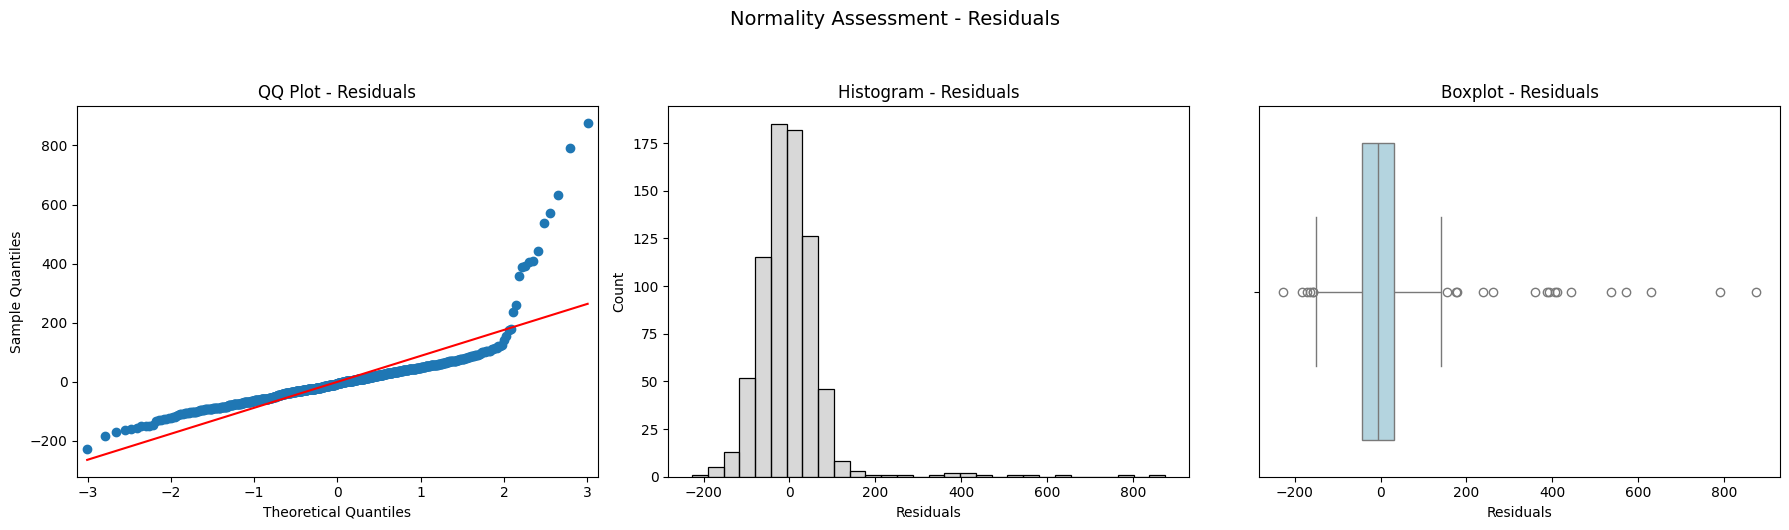

In [ ]:
# Check Residual Normality - Normality Testing
qd.normcheck_dashboard(res)

## **Normality Test Interpretation**

The Anderson–Darling test produced a statistic of 31.53, far exceeding the 5% critical value of 0.783, leading to a ***rejection of the null hypothesis*** of normality. This means the residuals do not follow a normal distribution.

Visual diagnostics support this result. The **Q–Q plot** appears slightly S-shaped, indicating deviations in both tails of the distribution. The **histogram** is right-skewed, showing that most residuals cluster toward lower values with a long positive tail. The **boxplot** also reveals a right-skewed pattern with several outliers on the higher end.

Overall, the residuals demonstrate **non-normality**, primarily due to positive skewness and outliers. This suggests that model assumptions may not be fully met, and transformations or robust modeling methods might be considered to improve distributional symmetry.

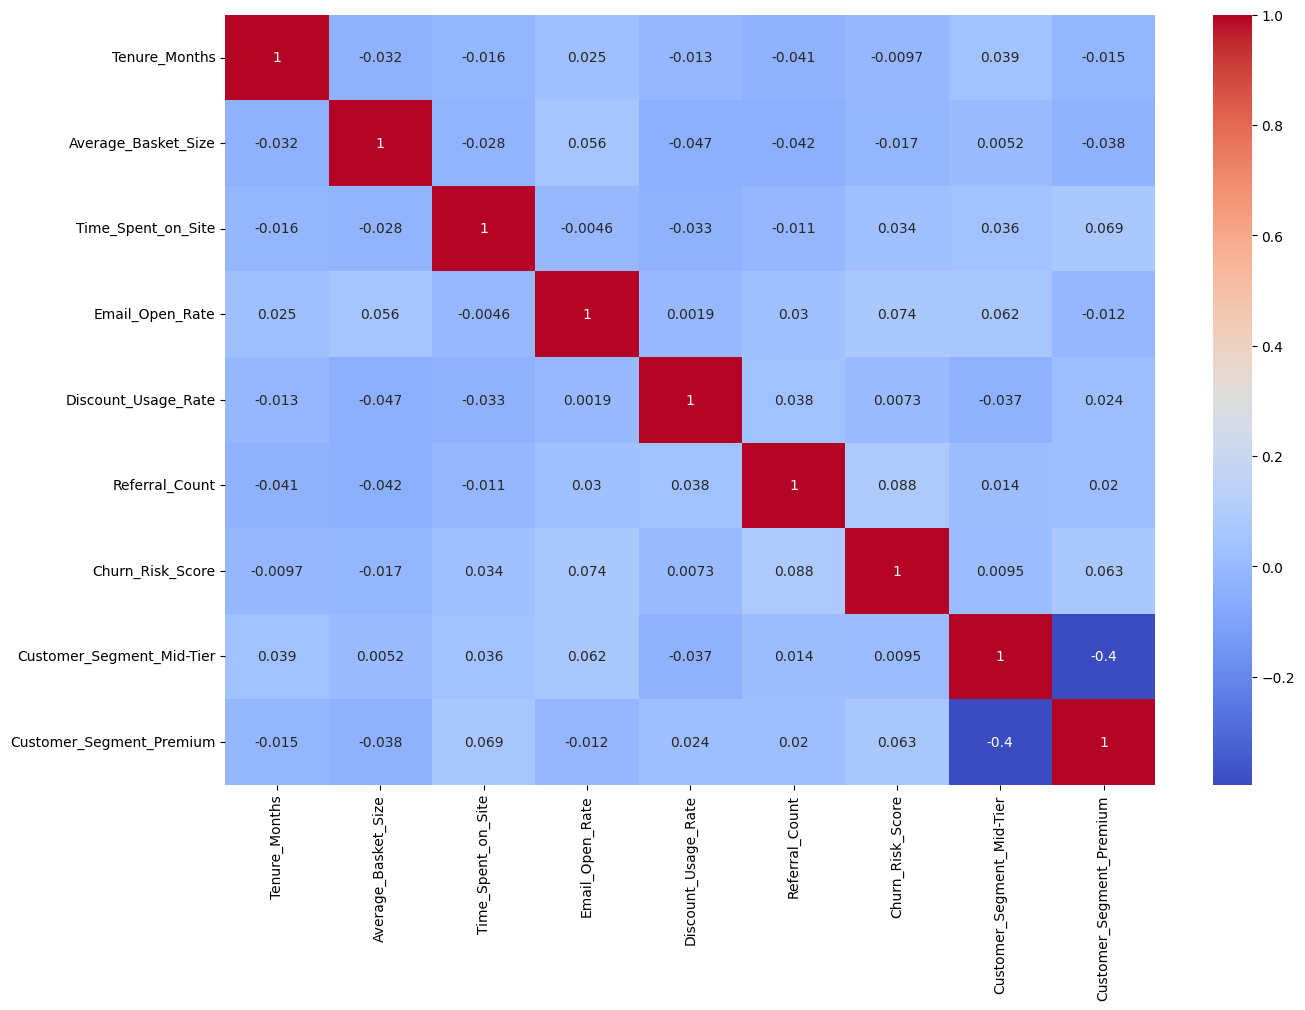

In [ ]:
# Create a Correlation Matrix to check for Multicollinearity
plt.figure(figsize=(15, 10))
sns.heatmap(X_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

## **Correlation Analysis Interpretation**
The correlation heatmap reveals that most variables have very **weak relationships** (close to 0), indicating minimal multicollinearity and that each feature contributes unique information about customer behavior. The only notable correlation is a moderate negative relationship (-0.4) between the **Mid-Tier** and **Premium customer segments**, which is expected since they represent different categories. Overall, the weak correlations across variables such as tenure, basket size, email engagement, and churn risk suggest that these predictors are largely independent, making the dataset suitable for regression or predictive modeling.

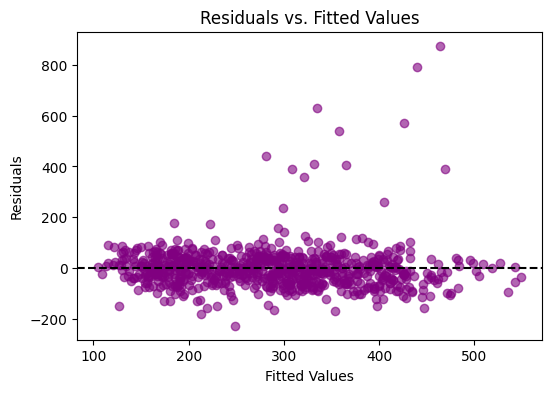

In [ ]:
# Check Homoscedasticity (constant variance of residuals) - Visualization
plt.figure(figsize=(6, 4))
plt.scatter(model.fittedvalues, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

## **Homoscedasticity Analysis Interpretation**

The Residuals vs. Fitted Values plot shows that most residuals are clustered around zero, suggesting a generally acceptable model fit. However, there are noticeable outliers and a few points with large positive residuals as fitted values increase, indicating possible **heteroscedasticity** (unequal variance of residuals). This pattern suggests that the variability of prediction errors grows with higher revenue levels — the model performs better for lower and mid-range revenues but struggles to predict very high-revenue customers accurately. This violation of constant variance implies that a robust regression or transformation may be more suitable to handle these outliers and non-constant error variance.

In [ ]:
# Check Homoscedasticity (constant variance of residuals) - Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan test p-value: {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Homoscedasticity assumption holds (fail to reject H0)")
else:
    print("Heteroscedasticity detected (reject H0)")

Breusch-Pagan test p-value: 0.0837
Homoscedasticity assumption holds (fail to reject H0)


## **Homoscedasticity Test (Breusch–Pagan) Interpretation**

The Breusch–Pagan test yielded a p-value of 0.0837, which is above 0.05, indicating that the homoscedasticity assumption holds. This means the residuals have constant variance, and the model’s error terms are evenly distributed across predicted values.

In [ ]:
# Standardize all numeric columns
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled_array, columns=X_encoded.columns, index=X_encoded.index)
# 5. Add constant (intercept)
X_const = sm.add_constant(X_scaled)

In [ ]:
# Huber robust regression
huber_model = sm.RLM(y, X_const, M=sm.robust.norms.HuberT())
huber_results = huber_model.fit()
print("\n=== Huber Robust Regression Summary ===\n")
print(huber_results.summary())


=== Huber Robust Regression Summary ===

                    Robust linear Model Regression Results                    
Dep. Variable:        Monthly_Revenue   No. Observations:                  750
Model:                            RLM   Df Residuals:                      740
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 18 Oct 2025                                         
Time:                        13:09:45                                         
No. Iterations:                    10                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

## **Huber Robust Regression Interpretation**

The Huber Robust Regression model was used to handle outliers and improve estimate reliability. The analysis revealed several key factors significantly influencing Monthly Revenue:
* **Average_Basket_Size** (β = 18.81, p < 0.001): Customers who spend more per
transaction generate higher monthly revenues, highlighting the importance of increasing average order value.
* **Time_Spent_on_Site** (β = 15.27, p < 0.001): Longer browsing time is linked to greater spending, indicating that higher engagement drives purchase activity.
* **Referral_Count** (β = 31.94, p < 0.001): Each referral notably increases revenue, showing that loyal and advocacy-driven customers are highly valuable.
* **Customer_Segment** (Mid-Tier = 50.77, Premium = 78.83, p < 0.001): Mid-Tier and Premium customers contribute significantly more revenue than Budget customers, confirming the profitability of higher-tier segments.
* **Churn_Risk_Score** (β = –13.04, p < 0.001): A higher churn risk score reduces revenue, emphasizing that customer retention strongly impacts financial performance.

Meanwhile, variables such as Tenure_Months, Email_Open_Rate, and Discount_Usage_Rate were not statistically significant, suggesting that their effects on revenue are limited once outliers are controlled.

The results highlight that **customer engagement**, **advocacy**, and **segment level** are the primary drivers of revenue, while churn risk negatively affects it. Strengthening engagement initiatives, referral programs, and retention strategies for high-value segments can effectively boost total revenue.